#UMEM LWR Exchange Paper for CISBAT

Clayton Miller - Apr 22, 2015
Daren Thomas - Apr 22, 2015 (mucking with Clayton's stuff for fun and profit)

In [41]:
import pandas as pd
import esoreader
import seaborn as sns
import os
%matplotlib inline
from pylab import *

First, let's grab one of the `.eso` files and see what's inside

In [42]:
UMEM_FOLDER = "/Users/millerc/Dropbox/UMEM/"
UMEM_LWR_OUTPUT_FOLDER = os.path.join(UMEM_FOLDER, 'LWR', 'Output')
esofile = esoreader.read_from_path(os.path.join(UMEM_LWR_OUTPUT_FOLDER, 'experiment01.eso'))

In [43]:
# here is a dict with all the variables you can read out of the current eso file
#(change idf and rerun simulations for more variables)
Varlist = pd.DataFrame(esofile.dd.variables)
Varlist = Varlist.T
Varlist

,0,1,2,3
98,Hourly,DPVWALL:1157026,Surface Inside Face Temperature,C
99,TimeStep,DPVWALL:1157026,Surface Outside Face Thermal Radiation to Air ...,W/m2-K
100,TimeStep,DPVWALL:1157026,Surface Outside Face Thermal Radiation to Sky ...,W/m2-K
101,TimeStep,DPVWALL:1157026,Surface Outside Face Thermal Radiation to Grou...,W/m2-K
102,RunPeriod,DPVWALL:1157026,Surface Inside Face Conduction Heat Gain Rate,W
103,RunPeriod,DPVWALL:1157026,Surface Inside Face Conduction Heat Loss Rate,W
104,Hourly,DPVWINDOW:1157123,Surface Inside Face Temperature,C
105,TimeStep,DPVWINDOW:1157123,Surface Outside Face Thermal Radiation to Air ...,W/m2-K
106,TimeStep,DPVWINDOW:1157123,Surface Outside Face Thermal Radiation to Sky ...,W/m2-K
107,TimeStep,DPVWINDOW:1157123,Surface Outside Face Thermal Radiation to Grou...,W/m2-K


##Set 1 - Experiments 1-4 Heating and Cooling Energy Analysis

EXPERIMENTS.txt
===============

This files describes the various experiments (by VisTrails workflow) used to verify the LWR code.

experiment01.vt
---------------

This experiment runs EnergyPlus with the model RevitModel.rvt that has been stripped of the
neighboring buildings.


experiment02.vt
---------------

This experiment runs the co-simulation (EnergyPlus & CitySim) with the model RevitModel.rvt that has been
stripped of the neighboring buildings.

We expect experiment01 and experiment02 to have the same result!


experiment03.vt
---------------

EnergyPlus with the full model RevitModel.rvt.


experiment04.vt
---------------

Co-Simulation with the full model RevitModel.rvt.


In [46]:
set1files = ["experiment01.eso","experiment02.eso","experiment03.eso","experiment04.eso"]

In [69]:
loadexample = {}
for esofilename in set1files:
    print "Loading", esofilename
    esofile = esoreader.read_from_path(os.path.join(UMEM_LWR_OUTPUT_FOLDER, esofilename))
    df = esofile.to_frame("cooling energy")
    hours_in_year = pd.date_range('2013-01-01', '2013-12-31 T23:00', freq='H')
    df.index = hours_in_year
    df = df* 0.000277777778 #Convert Joules to Wh
    loadexample[esofilename] = df["DEFAULT_ZONEZONEHVAC:IDEALLOADSAIRSYSTEM"]

Loading experiment01.eso
Loading experiment02.eso
Loading experiment03.eso
Loading experiment04.eso


In [70]:
df = pd.DataFrame(loadexample)
df.columns = ["1_EnergyPlusSolo_NoSurrounding","2_EnergyPlusCoupled_NoSurrounding","3_EnergyPlusSolo_Surrounding","4_EnergyPlusCoupled_Surrounding"]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2013-01-01 00:00:00 to 2013-12-31 23:00:00
Freq: H
Data columns (total 4 columns):
1_EnergyPlusSolo_NoSurrounding       8760 non-null float64
2_EnergyPlusCoupled_NoSurrounding    8760 non-null float64
3_EnergyPlusSolo_Surrounding         8760 non-null float64
4_EnergyPlusCoupled_Surrounding      8760 non-null float64
dtypes: float64(4)
memory usage: 342.2 KB


In [72]:
# also, you can search for variables like this:
##esofile.find_variable('Zone Ideal Loads Zone Total Heating')

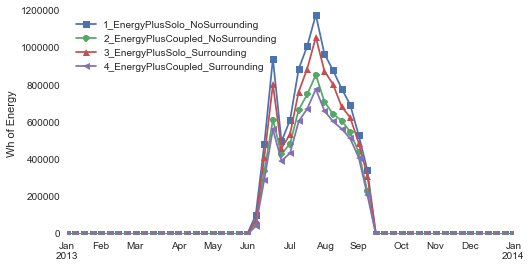

In [78]:
styles1 = ['s-','o-','^-','<-']
ax = df.resample('W',how='sum').plot(figsize=(8,4), style=styles1)
ax.set_ylabel("Wh of Energy");

In [29]:
commoncolumns = df1.columns

In [30]:
commoncolumns

Index([u'DEFAULT_ZONEZONEHVAC:IDEALLOADSAIRSYSTEM'], dtype='object')

###Let's grab all the `.eso` files and pull out the cooling loads -- *DEFAULT_ZONEZONEHVAC:IDEALLOADSAIRSYSTEM*

In [31]:
esofilenames = [f for f in os.listdir(UMEM_LWR_OUTPUT_FOLDER)
                if f.endswith('.eso')
                and f.startswith('experiment')]

In [32]:
loadexample = {}
for esofilename in esofilenames:
    print "Loading", esofilename
    esofile = esoreader.read_from_path(os.path.join(UMEM_LWR_OUTPUT_FOLDER, esofilename))
    df = esofile.to_frame("cooling energy")
    hours_in_year = pd.date_range('2013-01-01', '2013-12-31 T23:00', freq='H')
    df.index = hours_in_year
    loadexample[esofilename] = df["DEFAULT_ZONEZONEHVAC:IDEALLOADSAIRSYSTEM"]


Loading experiment01.eso
Loading experiment02.eso
Loading experiment03.eso
Loading experiment04.eso
Loading experiment05a.eso
Loading experiment05b.eso
Loading experiment05c.eso
Loading experiment05d.eso
Loading experiment05e.eso
Loading experiment12.eso


StopIteration: 

In [38]:
df = pd.DataFrame(loadexample)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2013-01-01 00:00:00 to 2013-12-31 23:00:00
Freq: H
Data columns (total 9 columns):
experiment01.eso     8760 non-null float64
experiment02.eso     8760 non-null float64
experiment03.eso     8760 non-null float64
experiment04.eso     8760 non-null float64
experiment05a.eso    8760 non-null float64
experiment05b.eso    8760 non-null float64
experiment05c.eso    8760 non-null float64
experiment05d.eso    8760 non-null float64
experiment05e.eso    8760 non-null float64
dtypes: float64(9)
memory usage: 684.4 KB


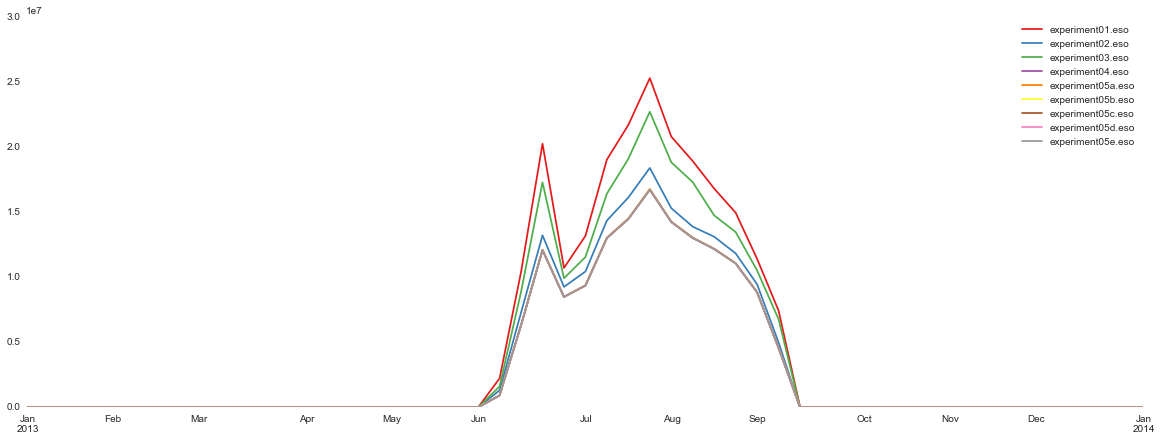

In [39]:
df.resample('W').plot(figsize=(20,7), color=sns.color_palette("Set1", 9))

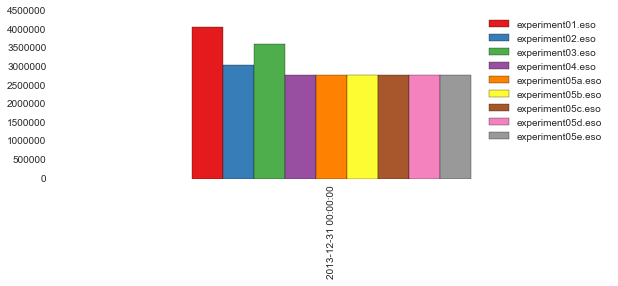

In [40]:
df.resample('A').plot(kind='bar', color=sns.color_palette("Set1", 9), figsize=(10,3))

##Let's load all of the variables from all of the `.eso` files

In [76]:
loadexample = {}
for esofilename in esofilenames[:1]:
    print "Loading "+esofilename
    esofile = esoreader.read_from_path("/Users/millerc/Dropbox/UMEM/LWR/Output/"+esofilename)
    df = esofile.to_frame("")
    hours_in_year = pd.date_range('2013-01-01', '2013-12-31 T23:00', freq='H')
    df.index = hours_in_year
    
#     loadexample_col = {}
#     for columnname in df.columns:
#         loadexample_col[columnname] = df[columnname]
    
    
    loadexample[esofilename] = loadexample_col

Loading experiment01.eso


In [34]:
commoncolumns.tolist()

['DEFAULT_ZONEZONEHVAC:IDEALLOADSAIRSYSTEM']

In [97]:
from matplotlib.backends.backend_pdf import PdfPages


Loading None
Loading DEFAULT_ZONE
Loading DEFAULT_ZONEZONEHVAC:IDEALLOADSAIRSYSTEM
Loading Z2
Loading Z2ZONEHVAC:IDEALLOADSAIRSYSTEM


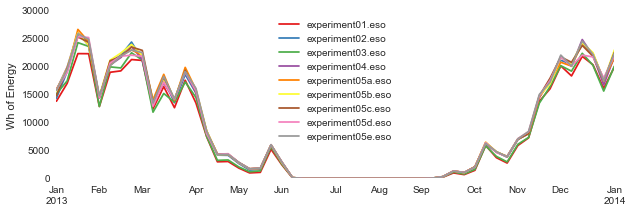

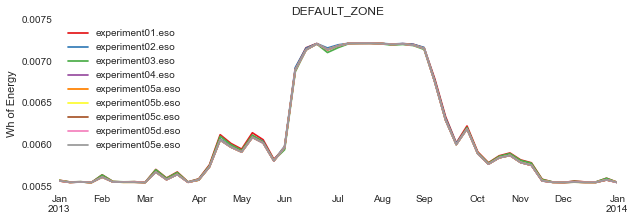

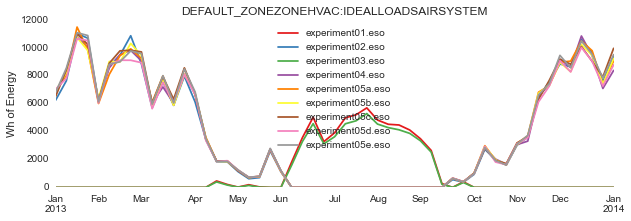

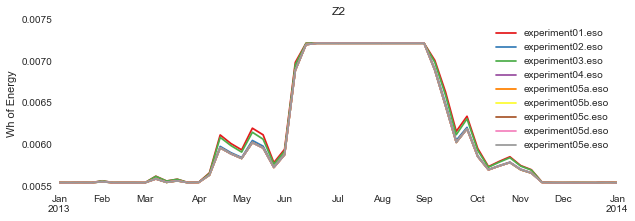

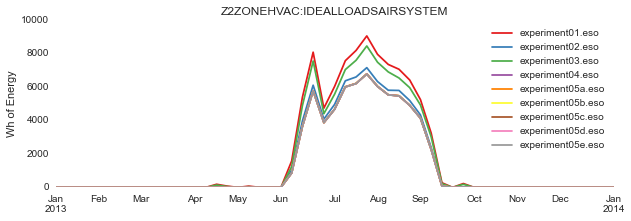

In [113]:
df_set = {}
for columnname in commoncolumns.tolist():
    print "Loading "+str(columnname)
    loadexample = {}
    for esofilename in esofilenames:
#         print "Loading "+esofilename
        esofile = esoreader.read_from_path("/Users/millerc/Dropbox/UMEM/LWR/Output/"+esofilename)
        df = esofile.to_frame("")
        hours_in_year = pd.date_range('2013-01-01', '2013-12-31 T23:00', freq='H')
        df.index = hours_in_year
        loadexample[esofilename] = df[columnname] * 0.000277777778 #Convert Joules to Wh
    df = pd.DataFrame(loadexample)
    
    df_set[columnname] = df
    
#     pp = PdfPages(str(columnname)+'.pdf')

    ax = df.resample('W').plot(figsize=(10,3), color=sns.color_palette("Set1", 9), title=columnname)
    ax.set_ylabel("Wh of Energy")
    savefig(str(columnname)+'.pdf')
    
    #pp2 = df.resample('A').plot(figsize=(10,3), color=sns.color_palette("Set1", 9), title=columnname)    #plt.show()

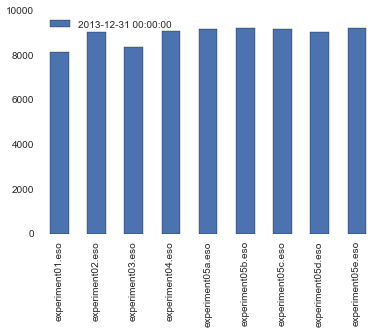

In [109]:
df_set[None].resample('A').T.plot(kind='bar')

In [35]:
df_set[None]

NameError: name 'df_set' is not defined

In [36]:
from lightning import Lightning 

In [121]:
host = 'http://clayton-lightning.herokuapp.com/'
auth = (os.getenv('LIGHTNING_USERNAME'), os.getenv('LIGHTNING_PASSWORD'))

In [122]:
lgn = Lightning(ipython=True, host=host, auth=auth)
lgn.create_session('matrix-ipython');

In [128]:
lgn.linestacked(df_set[None].T, label=["a","b"])